# Theory

1. **What is TF-IDF?**
* TF-IDF = Term Frequency – Inverse Document Frequency

* Goal:
    * Give each word a weight:
    * High if it’s important to the document.
    * Low if it’s common in many documents (less informative).

2. **The intuition**
* Imagine you have a library.

    * If a word occurs a lot in one document, it’s probably important.

    * If a word occurs in every document, it’s probably boring.

* TF-IDF balances these:

    * Term Frequency (TF) says: “How frequent is this word in this document?”

    * Inverse Document Frequency (IDF) says: “How rare is this word across the whole corpus?
 
3. **The Formulas**

**Term Frequency (TF)**  
Measures how often a term appears in a document.

$$
\text{TF}(t, d) = \frac{\text{Number of occurrences of term } t \text{ in document } d}{\text{Total number of terms in document } d}
$$

---

**Inverse Document Frequency (IDF)**  
Measures how rare a term is across all documents.

$$
\text{IDF}(t) = \log\left(\frac{N}{\text{df}(t)}\right)
$$

**Where:**

-  $$(N)$$ = total number of documents  
-  $$\text{df}(t)$$ = number of documents containing term \(t\)

---

**TF-IDF**

$$
\text{TF-IDF}(t,d) = \text{TF}(t,d) \times \text{IDF}(t)
$$

---

**Interpretation**

- **High TF-IDF:** Term is frequent in this document but rare across the corpus.
- **Low TF-IDF:** Term is common across many documents or infrequent everywhere.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np

In [8]:
df = pd.read_csv(r"C:\Users\Deepam Shah\Downloads\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
x = df.iloc[0]
x

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                      32.985763
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

### simple working of iloc explaination

* .iloc[rows, columns]
1. df.iloc[1]
Returns row at index 1 (second row):
2. df.iloc[[0, 2]]
Returns rows 0 and 2:
3. df.iloc[1:3]
Returns rows 1 and 2 (note: end index is exclusive):
4. df.iloc[0:3, 1:3]
Means:
Rows 0 to 2
Columns 1 and 2 (columns by position: Age and City)
5. df.iloc[2, 1]
Row index 2, column index 1:
6. df.iloc[:, 2]
All rows, column at index 2 (City):
7. df.iloc[-1]
Returns the last row:

* Tip to remember:

    * iloc always uses integer positions.

    * If you want to select by label names, use .loc.

In [10]:
x['genres']

'Action|Adventure|Science Fiction|Thriller'

In [23]:
j = x['genres']
j = j.replace('|', ' ')
print(j)

Action Adventure Science Fiction Thriller


In [30]:
def combine_columns(row):
    # Use str or '' if value is NaN
    keywords = str(row["keywords"]) if pd.notnull(row["keywords"]) else ""
    genres = str(row["genres"]) if pd.notnull(row["genres"]) else ""

    # Replace | with space
    keywords = keywords.replace("|", " ")
    genres = genres.replace("|", " ")

    # Concatenate all text
    return f"{keywords} {genres}"


In [31]:
# create a new string representation of each movie
df['string'] = df.apply(combine_columns, axis=1)

In [34]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000)

# Only keep the top 2000 most frequent terms across the entire corpus.

# In other words:

# First, TfidfVectorizer counts how often each term occurs across all documents.
# It sorts all terms by frequency.
# It keeps only the top 2000 terms (the most frequent).
# All less frequent words are discarded and ignored.

In [35]:
# create a data matrix from the overviews
X = tfidf.fit_transform(df['string'])

In [36]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 74241 stored elements and shape (10866, 2000)>

In [37]:
(X != 0).sum().item()

74241

In [42]:
# What percentage of values are non-zero?
((X != 0).sum().item()/ np.prod(X.shape)).item()

0.003416206515737162

In [45]:
# generate a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['original_title'])
movie2idx

original_title
Jurassic World                      0
Mad Max: Fury Road                  1
Insurgent                           2
Star Wars: The Force Awakens        3
Furious 7                           4
                                ...  
The Endless Summer              10861
Grand Prix                      10862
Beregis Avtomobilya             10863
What's Up, Tiger Lily?          10864
Manos: The Hands of Fate        10865
Length: 10866, dtype: int64

In [48]:
df['original_title'].unique()

array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent', ...,
       'Beregis Avtomobilya', "What's Up, Tiger Lily?",
       'Manos: The Hands of Fate'], dtype=object)

How does pd.Series() work here?

pd.Series(data, index=index)
creates a Series where:

Values = data

Labels = index

data = df.index
[0, 1, 2, 3, 4]

index = df['original_title']
['Jurassic World', 'Mad Max', 'Divergent', 'Star Wars', 'Furious 7']


Final result:- 
----------------------
Jurassic World      0 |
Mad Max             1 |
Divergent           2 |
Star Wars           3 |
Furious 7           4 |
dtype: int64
-----------------------

In [64]:
idx = movie2idx['Mad Max']
idx.item()

7827

In [65]:
query = X[idx]
query

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11 stored elements and shape (1, 2000)>

In [66]:
# print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

X[idx] selects the TF-IDF vector of a particular movie.

* idx is the index you found via movie2idx[title].

* So:
    * If idx=0 (e.g., "Jurassic World"), then:


* query = X[0]
    * query is the vector representation of Jurassic World.


## Typical workflow:
* Let’s do it in plain steps:
1. User picks:
"Mad Max"

2. You get index:
idx = movie2idx["Mad Max"]


3. You get its TF-IDF vector:
query = X[idx]


4. You compare query to all other movies:

```python
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(query, X)
```
* **This returns similarity scores between Mad Max and every other movie.**

5. You sort and get the top N recommendations.

In [67]:
# compute similarity between query vector and every vector in X
scores = cosine_similarity(query, X)
scores, scores.shape

# Note if you have 10 query vectors and about 10000 movies then shape of scores would be (20, 10000)

(array([[0.13479062, 0.5119687 , 0.20810427, ..., 0.        , 0.04985118,
         0.        ]]),
 (1, 10866))

In [68]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()

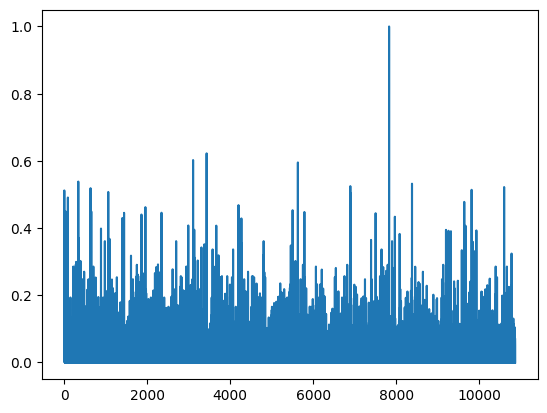

In [69]:
plt.plot(scores);

In [70]:
(-scores).argsort()

array([ 7827,  3430,  3104, ..., 10863,    18, 10865])

#### (-scores).argsort()
This:
* Negates all the scores (so high similarity becomes low and vice versa)

* Then does argsort(), which sorts the values from smallest to largest

* Because you negated the scores, this gives you descending similarity order

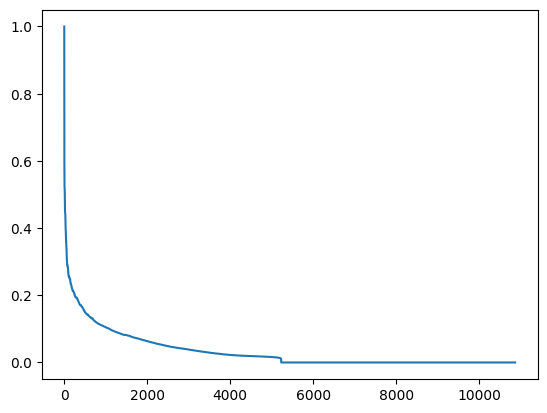

In [71]:
plt.plot(scores[(-scores).argsort()]);

#### What does argsort() do?
* argsort() returns the indices that would sort the array.

* You can use these indices to reorder the original array or index into other related arrays.
```python
arr = np.array([10, 30, 20])

indices = np.argsort(arr)
print(indices)

Output:- 
[0, 2, 1]
```
* When you’re ranking movies:

    * You don’t just want to sort the scores and lose track of which movie each score belongs to.

    * You want to keep the mapping between similarity scores and the movie indices.

In [72]:
# Get the top 5 matches
# Exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6]

In [73]:
df['original_title'].iloc[recommended_idx]

3430            Priest
3104    20 Years After
5629     Bounty Killer
338          Turbo Kid
8379         Mad Max 2
Name: original_title, dtype: object

In [76]:
# create a function that generates recommendations
def recommend(title):
    # Get the row in the dataframe for this movie
    idx = movie2idx[title]
    if type[idx] == pd.Series:
        idx = idx.iloc[0]

    # calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)

    # currently the array is 1 x N, make it just a 1-D array
    scores = scores.flatten()

    # Get the indexes of the highest scoring movies
    # Get the first K recommendations
    # Don't return itself!
    recommended_idx = (-scores).argsort()[1:6]

    # return the titles of the recommendations
    return df['original_title'].iloc[recommended_idx]

### Why do we check the type?
```python
if type(idx) == pd.Series:
    idx = idx.iloc[0]
```
* We check:

    * Is idx a pd.Series?
    * If yes, we grab the first element using .iloc[0].

* Why? Because:

    * Cosine similarity expects just one row index (an integer).
    * Not a whole Series of multiple matches.

* So this ensures:

    * If title is unique: idx is an int, no problem.
    * If title is duplicated: we just use the first match.

#### Example:
Suppose:
```python
movie2idx["Mad Max"] = pd.Series([1, 102])
```
Then:
```
type(idx) == pd.Series      :-True
```
So:
```python
idx = idx.iloc[0]           # idx = 1
```
Now we can safely do:
```python
query = X[idx]
```

In [77]:
print("Recommendations for 'Mad Max':")
print(recommend('Mad Max'))

Recommendations for 'Mad Max':
3430            Priest
3104    20 Years After
5629     Bounty Killer
338          Turbo Kid
8379         Mad Max 2
Name: original_title, dtype: object


In [79]:
print("Recommendations for 'Star Wars':")
print(recommend('Star Wars'))

Recommendations for 'Star Wars':
2784                                             Impostor
8734                                           Titan A.E.
2412            Star Wars: Episode I - The Phantom Menace
7645       Babylon 5: The Lost Tales - Voices in the Dark
4068    Babylon 5: The Legend of the Rangers - To Live...
Name: original_title, dtype: object


In [80]:
print("Recommendations for 'Insurgent':")
print(recommend('Insurgent'))

Recommendations for 'Insurgent':
642                                    Divergent
5463     Batman: The Dark Knight Returns, Part 2
4400     Batman: The Dark Knight Returns, Part 1
10609                                    Sleeper
3863                                     Manborg
Name: original_title, dtype: object
